Task 1

Import needed libraries (numpy, random, mathplotlib, scipy.signal), generate 20 random numbers and plot them on the graph

[77, 74, 96, 82, 75, 91, 99, 5, 9, 64, 59, 81, 56, 65, 37, 55, 96, 38, 99, 74]


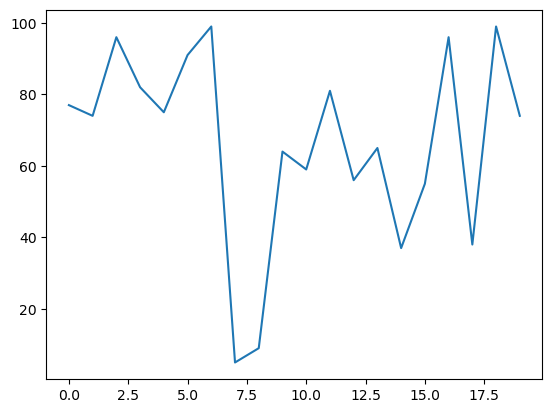

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# generating 20 random numbers from 1 to 100
heights =[]
for i in range(20):
    heights.append(random.randint(1,100))
    i+=1
print (heights)
plt.plot(heights)
plt.show()
# We plot these points on the graph


Looking for a valley with the deepest lake

In [2]:
# Looking for the peaks
peaks, _ = find_peaks(heights)

#We add the extreme points as peaks if they are higher than the neighboring ones
if heights[0] > heights[1]:
    peaks = np.insert(peaks, 0, 0)
if heights[-1] > heights[-2]:
    peaks = np.append(peaks, len(heights) - 1)

#Finding two peaks with the maximum depth of the valley
max_depth = 0
best_valley = (0, 0, 0, 0)  # (left vertex, right vertex, lowest point, depth)

for i in range(len(peaks) - 1): #The loop checks all values ​​except the last one, because it may not have a match
    for j in range(i + 1, len(peaks)): #The loop checks the value from the second to the last, because the first value is calculated by the loop from above
        left_peak, right_peak = peaks[i], peaks[j] #After the loop, the values ​​are written to left_peak and right_peak

        #We check whether there are no points between the peaks that are higher than the lake level
        min_peak_height = min(heights[left_peak], heights[right_peak]) 
        if np.any(np.array(heights[left_peak + 1:right_peak]) > min_peak_height): #The loop checks if there is a larger value between the two required peaks
            continue

        # We find the lowest point between the vertices
        valley_index = np.argmin(heights[left_peak:right_peak + 1]) + left_peak
        depth = min_peak_height - heights[valley_index]

        if depth > max_depth:
            max_depth = depth
            best_valley = (left_peak, right_peak, valley_index, depth)



Visualization 

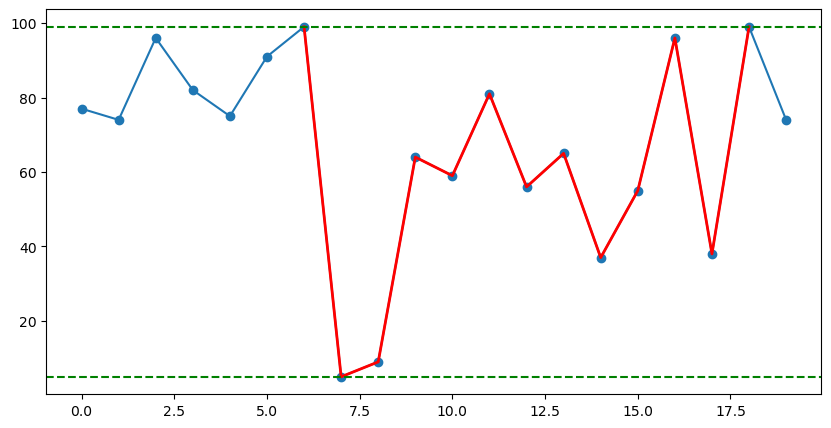

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(heights, marker='o', linestyle='-')

# Highlight the lake area in red
start, end, valley, depth = best_valley
plt.plot(range(start, end + 1), heights[start:end + 1], color='r', linewidth=2)

#Adding water level lines
plt.axhline(y=heights[valley], color='g', linestyle='--')
plt.axhline(y=min(heights[start], heights[end]), color='g', linestyle='--')

